### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
path = r'C:\Users\ADI\Desktop\ASIAN-PAINTS.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io


df = pd.read_csv (path)
df.rename(columns={'Date': 'date', 'Open Price': 'open', 'High Price': 'high', 'Low Price': 'low', 'Close Price': 'close', 'WAP': 'wap', 'No.of Shares' : 'shares', 'No. of Trades' : 'trades', 'Total Turnover (Rs.)' : 'turnover', 'Deliverable Quantity' : 'deliQty', '% Deli. Qty to Traded Qty' : 'deliQtyToTradedQty', 'Spread High-Low' : 'highLowSpread', 'Spread Close-Open' : 'closeOpenSpread'}, inplace = True)

In [3]:
df

,date,open,high,low,close,wap,shares,trades,turnover,deliQty,deliQtyToTradedQty,highLowSpread,closeOpenSpread
0,8-April-2022,3172.85,3219.00,3150.70,3206.70,3190.305220,63125,8976,201388017.0,34502.0,54.66,68.30,33.85
1,7-April-2022,3145.40,3208.95,3145.40,3155.30,3174.126443,113031,10464,358774686.0,55258.0,48.89,63.55,9.90
2,6-April-2022,3139.60,3165.00,3112.55,3155.05,3144.289330,47496,4958,149341166.0,25788.0,54.30,52.45,15.45
3,5-April-2022,3116.00,3157.25,3080.80,3139.60,3140.860434,48658,3918,152827987.0,29864.0,61.38,76.45,23.60
4,4-April-2022,3147.00,3147.00,3092.60,3117.65,3118.713192,60368,10156,188270478.0,34489.0,57.13,54.40,-29.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,17-April-2014,535.00,545.45,533.85,543.60,540.104629,50961,2854,27524272.0,14116.0,27.70,11.60,8.60
1972,16-April-2014,535.90,538.50,533.00,534.55,535.380639,32653,1832,17481784.0,5925.0,18.15,5.50,-1.35
1973,15-April-2014,543.75,544.00,531.10,534.80,535.949555,39370,1988,21100334.0,9900.0,25.15,12.90,-8.95
1974,11-April-2014,540.10,544.95,536.00,541.95,541.192761,48599,2619,26301427.0,13314.0,27.40,8.95,1.85


In [4]:
df['date'] = pd.to_datetime(df['date'], format = '%d-%B-%Y')
df.set_index('date',inplace = True)
df.sort_index(inplace = True)

In [5]:
df1 = df.reset_index()['close']

In [6]:
df1

0        541.30
1        541.95
2        534.80
3        534.55
4        543.60
         ...   
1971    3117.65
1972    3139.60
1973    3155.05
1974    3155.30
1975    3206.70
Name: close, Length: 1976, dtype: float64

In [7]:
df1.shape

(1976,)

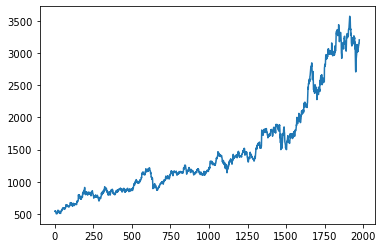

In [8]:
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.0139776 ]
 [0.01418889]
 [0.01186471]
 ...
 [0.8636046 ]
 [0.86368586]
 [0.88039397]]


In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(1284, 692)

In [13]:
train_data

array([[0.0139776 ],
       [0.01418889],
       [0.01186471],
       ...,
       [0.28545192],
       [0.28114486],
       [0.28007216]])

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1183, 100)
(1183,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(591, 100)
(591,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 11s 237ms/step - loss: 0.0068 - val_loss: 0.0525
Epoch 2/100
19/19 [==============================] - 3s 144ms/step - loss: 8.6193e-04 - val_loss: 0.0092
Epoch 3/100
19/19 [==============================] - 3s 148ms/step - loss: 2.7926e-04 - val_loss: 0.0035
Epoch 4/100
19/19 [==============================] - 3s 155ms/step - loss: 2.2419e-04 - val_loss: 0.0049
Epoch 5/100
19/19 [==============================] - 3s 150ms/step - loss: 2.0901e-04 - val_loss: 0.0038
Epoch 6/100
19/19 [==============================] - 3s 151ms/step - loss: 2.0934e-04 - val_loss: 0.0042
Epoch 7/100
19/19 [==============================] - 3s 175ms/step - loss: 2.0475e-04 - val_loss: 0.0043
Epoch 8/100
19/19 [==============================] - 3s 158ms/step - loss: 2.0579e-04 - val_loss: 0.0040
Epoch 9/100
19/19 [==============================] - 4s 200ms/step - loss: 2.0044e-04 - val_loss: 0.0033
Epoch 10/100
19/19 [==============================] - 3s 1

Epoch 78/100
19/19 [==============================] - 3s 164ms/step - loss: 6.2441e-05 - val_loss: 5.5746e-04
Epoch 79/100
19/19 [==============================] - 3s 166ms/step - loss: 6.2198e-05 - val_loss: 4.9330e-04
Epoch 80/100
19/19 [==============================] - 3s 165ms/step - loss: 5.6165e-05 - val_loss: 3.7650e-04
Epoch 81/100
19/19 [==============================] - 3s 177ms/step - loss: 5.0894e-05 - val_loss: 3.8345e-04
Epoch 82/100
19/19 [==============================] - 4s 192ms/step - loss: 5.0791e-05 - val_loss: 3.8907e-04
Epoch 83/100
19/19 [==============================] - 4s 195ms/step - loss: 4.8884e-05 - val_loss: 3.8721e-04
Epoch 84/100
19/19 [==============================] - 4s 193ms/step - loss: 5.0137e-05 - val_loss: 3.7581e-04
Epoch 85/100
19/19 [==============================] - 3s 181ms/step - loss: 5.2673e-05 - val_loss: 6.2425e-04
Epoch 86/100
19/19 [==============================] - 3s 180ms/step - loss: 4.7990e-05 - val_loss: 3.6982e-04
Epoch 87/1

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.8.0'

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1070.1643769068962

In [58]:
### Test Data RMSE
metrics.mean_squared_error(ytest,test_predict) ** .5

24.966937615336047

In [37]:
from sklearn import metrics

In [56]:
metrics.mean_squared_error(ytest,test_predict)

623.347973888082

In [54]:
metrics.r2_score(ytest,test_predict)

0.9441807587463474

In [43]:
metrics.mean_absolute_percentage_error(ytest, test_predict)

38.89817691950829

In [44]:
metrics.mean_absolute_error(ytest, test_predict)

24.208666713266286

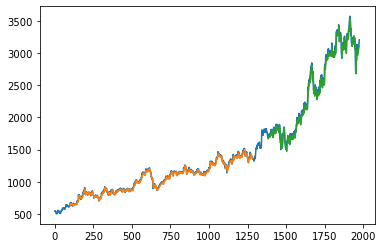

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

692

In [32]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 351)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.5530417540266875,
 0.5472719293968502,
 0.5439563118630845,
 0.546508037121914,
 0.5481170868074179,
 0.5489134851366066,
 0.5518552830464674,
 0.5405594291936873,
 0.5414045866042551,
 0.5497098834657955,
 0.5556259853397695,
 0.5383002584231313,
 0.5388528613454255,
 0.5587953256293985,
 0.5628098233295951,
 0.5909600663123508,
 0.6216945406081882,
 0.6307637297446649,
 0.6419295593804346,
 0.6307962357989175,
 0.6575487184488111,
 0.6601654558161457,
 0.6572399109334113,
 0.6667316787751719,
 0.6594990817039674,
 0.6772961464072683,
 0.6747281681213125,
 0.6836835860679052,
 0.6684544996505598,
 0.6846912737497359,
 0.6970760804199783,
 0.6992214800006501,
 0.7103710566092934,
 0.7144993254993742,
 0.7265915776813432,
 0.7366359484453979,
 0.7400653371690478,
 0.7334991142100217,
 0.7459976920701481,
 0.7492157914411559,
 0.7453800770393485,
 0.7624945146033448,
 0.7641848294244802,
 0.7278105547158159,
 0.7171485689209616,
 0.7038210866773936,
 0.6799291368017293,
 0.67962032928

In [35]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.54727193 0.54395631 0.54650804 0.54811709 0.54891349 0.55185528
 0.54055943 0.54140459 0.54970988 0.55562599 0.53830026 0.53885286
 0.55879533 0.56280982 0.59096007 0.62169454 0.63076373 0.64192956
 0.63079624 0.65754872 0.66016546 0.65723991 0.66673168 0.65949908
 0.67729615 0.67472817 0.68368359 0.6684545  0.68469127 0.69707608
 0.69922148 0.71037106 0.71449933 0.72659158 0.73663595 0.74006534
 0.73349911 0.74599769 0.74921579 0.74538008 0.76249451 0.76418483
 0.72781055 0.71714857 0.70382109 0.67992914 0.67962033 0.6980025
 0.71500317 0.72044793 0.6821233  0.65540332 0.62985356 0.63204772
 0.62055683 0.63312042 0.63872771 0.63536334 0.61881775 0.61062623
 0.6238887  0.65298162 0.65394055 0.65242901 0.64612284 0.63692363
 0.63442066 0.61465698 0.64098688 0.62431128 0.61399061 0.60950477
 0.60802574 0.60955353 0.57833146 0.60615665 0.61519333 0.61889902
 0.62398622 0.61386058 0.61273912 0.62574154 0.62853707 0.6188015
 0.60384872 0.64118192 0.62553026 0.61954914 0.62154

ValueError: cannot reshape array of size 350 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)